In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [2]:
# paths for the three dfs

df_jan_path = "../data/raw/yellow_tripdata_2016-01.csv"
df_feb_path = "../data/raw/yellow_tripdata_2016-02.csv"
df_mar_path = "../data/raw/yellow_tripdata_2016-03.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_feb = dd.read_csv(df_feb_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])
df_mar = dd.read_csv(df_mar_path, assume_missing=True, usecols= ['trip_distance', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'fare_amount'])

In [3]:
df_jan.head(6)

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
0,1.10,-73.990372,40.734695,-73.981842,40.732407,7.5
1,4.90,-73.980782,40.729912,-73.944473,40.716679,18.0
2,10.54,-73.984550,40.679565,-73.950272,40.788925,33.0
3,4.75,-73.993469,40.718990,-73.962242,40.657333,16.5
4,1.76,-73.960625,40.781330,-73.977264,40.758514,8.0
5,5.52,-73.980118,40.743050,-73.913490,40.763142,19.0


In [4]:
df=dd.concat([df_jan,df_feb,df_mar],axis=0)

## NewyorkBound locations

In [5]:
min_latitude = 40.60
max_latitude = 40.85
min_longitude = -74.05
max_longitude = -73.70

In [8]:
df

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=82,,,,,,
,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [7]:
fare_amount=df["fare_amount"].compute()

In [8]:
percentile=np.arange(0.991,1.00,0.001)

fare_amount.quantile(percentile)

0.991        52.00
0.992        52.00
0.993        52.00
0.994        52.00
0.995        54.00
0.996        58.50
0.997        63.00
0.998        69.00
0.999        81.00
1.000    429496.72
Name: fare_amount, dtype: float64

* Max fare amount is 81.00
* Min fare amount is 50 


In [11]:
trip_distance=df["trip_distance"].compute()

In [12]:
percentile=np.arange(0.991,1.00,0.001)

trip_distance.quantile(percentile)

0.991          18.80
0.992          19.00
0.993          19.30
0.994          19.63
0.995          20.04
0.996          20.51
0.997          21.10
0.998          21.90
0.999          24.43
1.000    19072628.80
Name: trip_distance, dtype: float64

* Max trip distance is 24.43
* Min trip distance is 0.25

## Outlier removal

In [14]:
df1=df[((df["pickup_longitude"].between(min_longitude,max_longitude,inclusive="both")) & (df["dropoff_longitude"].between(min_longitude,max_longitude,inclusive="both")) & (df["fare_amount"].between(0.5,81.0,inclusive="both")) & (df["trip_distance"].between(0.25,24.43,inclusive="both")) & (df["pickup_latitude"].between(min_latitude,max_latitude,inclusive="both")) & (df["dropoff_latitude"].between(min_latitude,max_latitude,inclusive="both")))]

In [16]:
df1.head(6)

,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
0,1.10,-73.990372,40.734695,-73.981842,40.732407,7.5
1,4.90,-73.980782,40.729912,-73.944473,40.716679,18.0
2,10.54,-73.984550,40.679565,-73.950272,40.788925,33.0
3,4.75,-73.993469,40.718990,-73.962242,40.657333,16.5
4,1.76,-73.960625,40.781330,-73.977264,40.758514,8.0
5,5.52,-73.980118,40.743050,-73.913490,40.763142,19.0


In [17]:
location_cols=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]

In [18]:


locations=df1[location_cols]

In [19]:
locations

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
npartitions=82,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


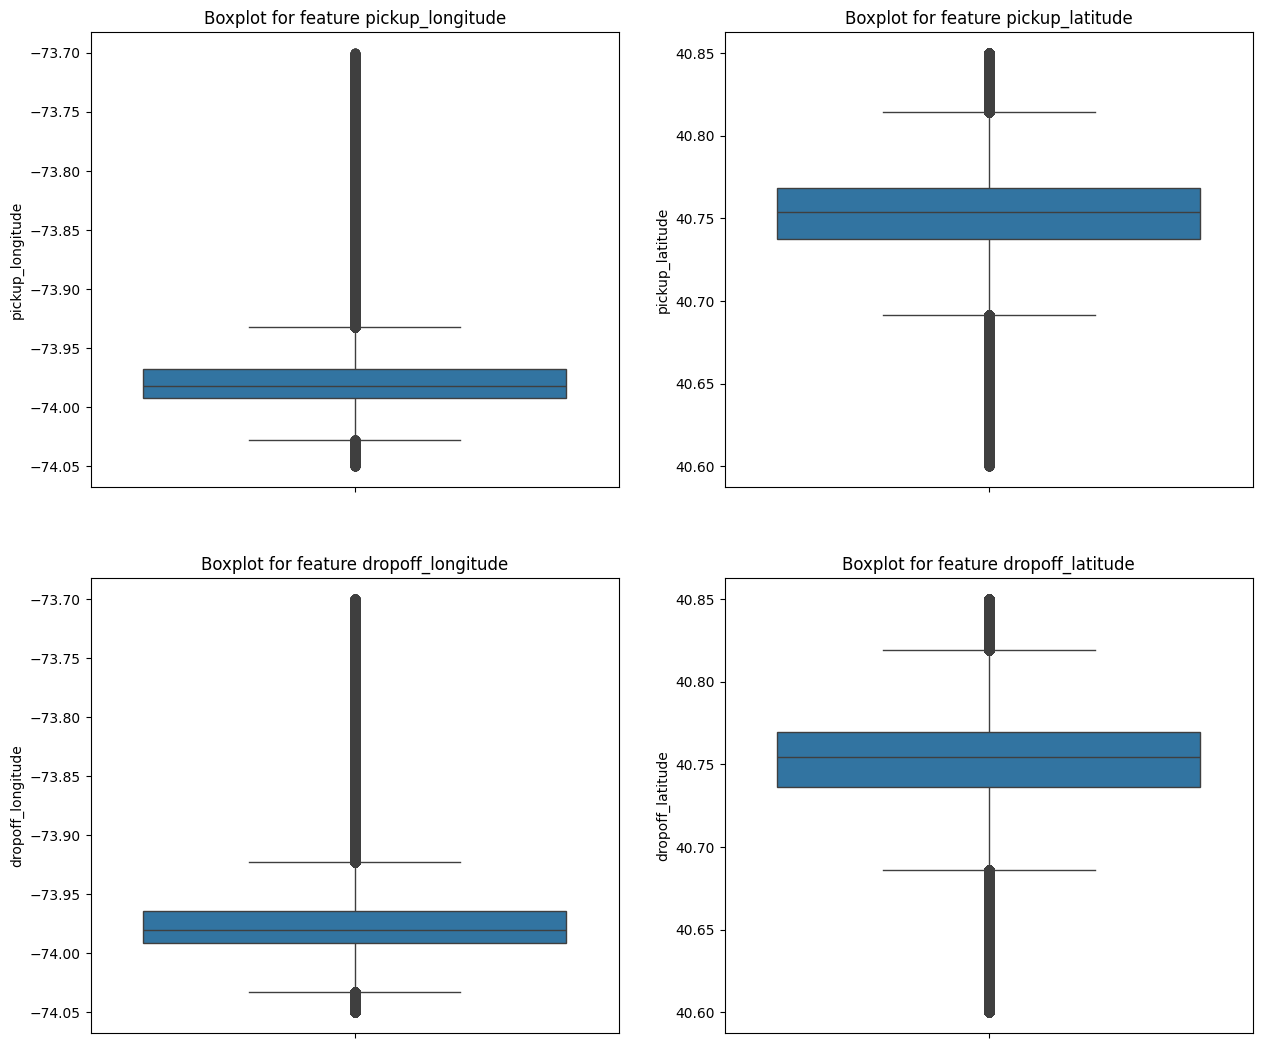

In [20]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,13))
ax=ax.flatten()

for i in range(4):
    sns.boxplot(locations.iloc[:,i].compute(),ax=ax[i])
    ax[i].set_title('Boxplot for feature ' + locations.columns[i])
    
    
plt.show()

In [23]:
save_path="../data/interim/location_data.csv"


In [21]:
lot=df1[['pickup_latitude','pickup_longitude']].compute()

In [24]:
lot.to_csv(save_path,index=False)

## breaking New York Into Regions

In [36]:

data_path = "../data/interim/location_data.csv"

df_reader = pd.read_csv(data_path, chunksize=70000)

df_reader

In [37]:
all_samples=[]

for df in df_reader:
    all_samples.append(df.sample(500))

In [38]:
sample_df=pd.concat(all_samples,axis=0)

In [39]:
sample_df

,pickup_latitude,pickup_longitude
54683,40.736702,-73.978752
1920,40.815842,-73.958443
6562,40.744240,-73.979149
54702,40.706333,-74.005920
23926,40.742413,-73.977982
...,...,...
33230828,40.736214,-73.991920
33204188,40.750229,-73.991287
33209864,40.766327,-73.995644
33222703,40.783554,-73.950478


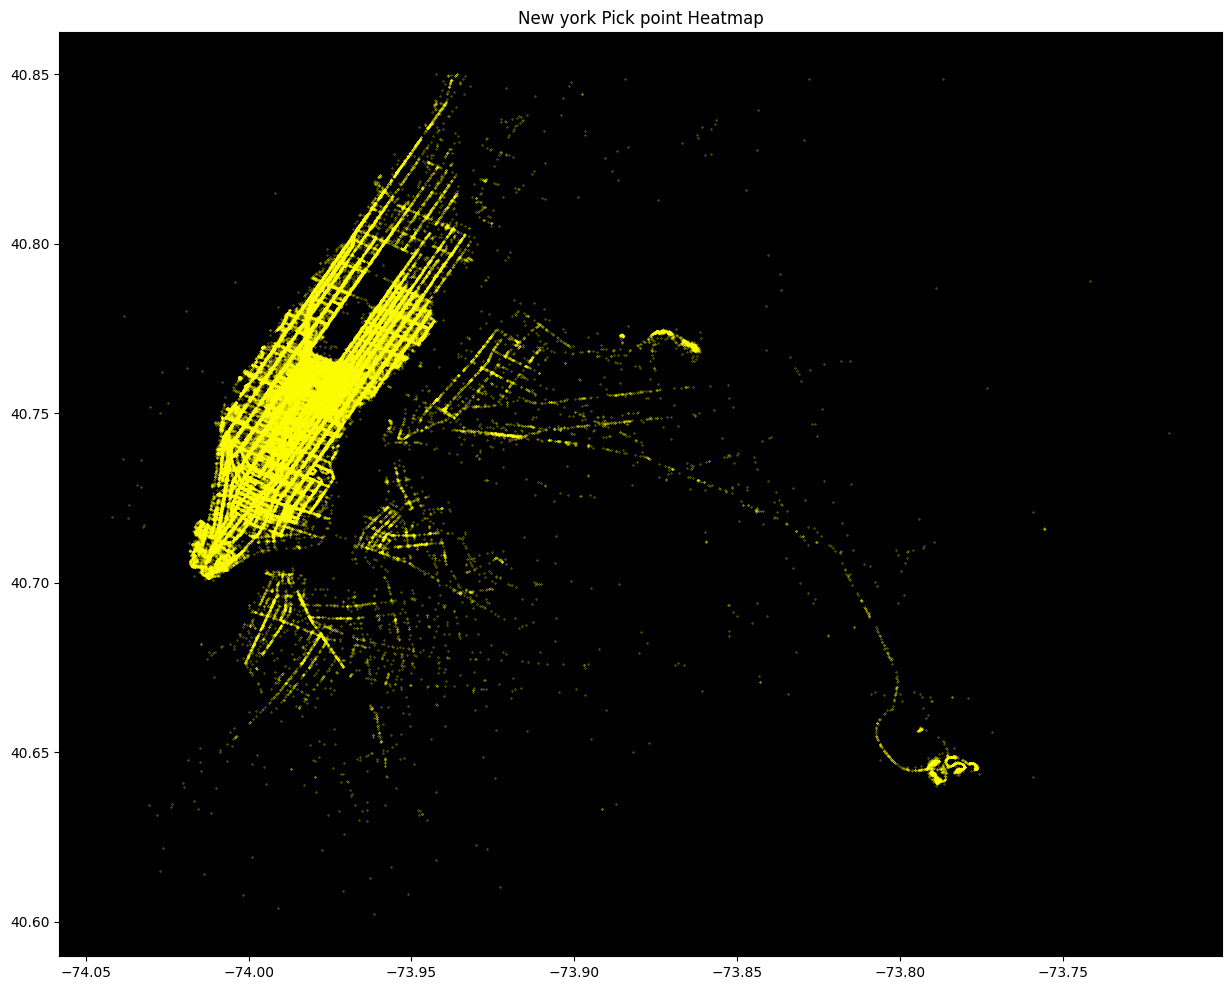

In [40]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,12),sharey=True)

ax.set_facecolor("k")
ax.set_title("New york Pick point Heatmap")
ax.scatter(sample_df["pickup_longitude"],sample_df["pickup_latitude"],s=0.05,color="yellow")


In [41]:
from sklearn import set_config
set_config(transform_output="pandas")

### Breaking the whole region into small small regions

In [43]:
from sklearn.preprocessing import StandardScaler

## Scale the latitude and longitude of the pickup and dropoff locations


In [45]:
scaler=StandardScaler()


In [46]:
scaler.fit(sample_df)

,copy,True
,with_mean,True
,with_std,True


In [48]:
scaler.mean_

array([ 40.75113941, -73.9740368 ])

In [51]:
scaler.var_

array([0.00074342, 0.00134826])

In [49]:
scaled_sample_df=scaler.transform(sample_df)

In [50]:
scaled_sample_df

,pickup_latitude,pickup_longitude
54683,-0.529508,-0.128418
1920,2.373023,0.424692
6562,-0.253050,-0.139223
54702,-1.643316,-0.868323
23926,-0.320066,-0.107432
...,...,...
33230828,-0.547416,-0.487046
33204188,-0.033394,-0.469801
33209864,0.557017,-0.588443
33222703,1.188842,0.641615


## Ploting the scatterplot after Scaling the data

C:\Users\Satyajit Samal\AppData\Local\Temp\ipykernel_31852\199530133.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=scaled_sample_df,x="pickup_latitude",y="pickup_longitude",palette="wormearth",s=10)


<Axes: xlabel='pickup_latitude', ylabel='pickup_longitude'>

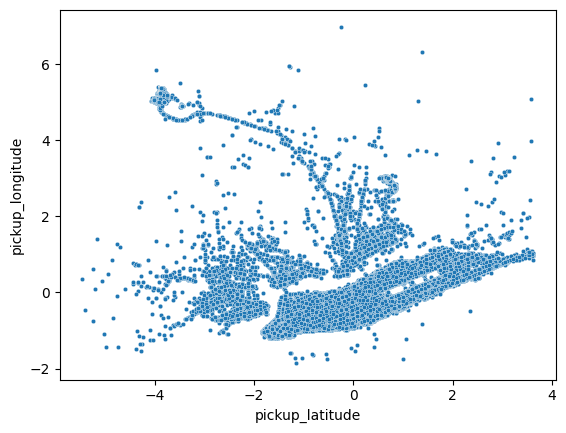

In [57]:
sns.scatterplot(data=scaled_sample_df,x="pickup_latitude",y="pickup_longitude",palette="wormearth",s=10)

Text(0.5, 1.0, 'Heat,ap of the scaled Data')

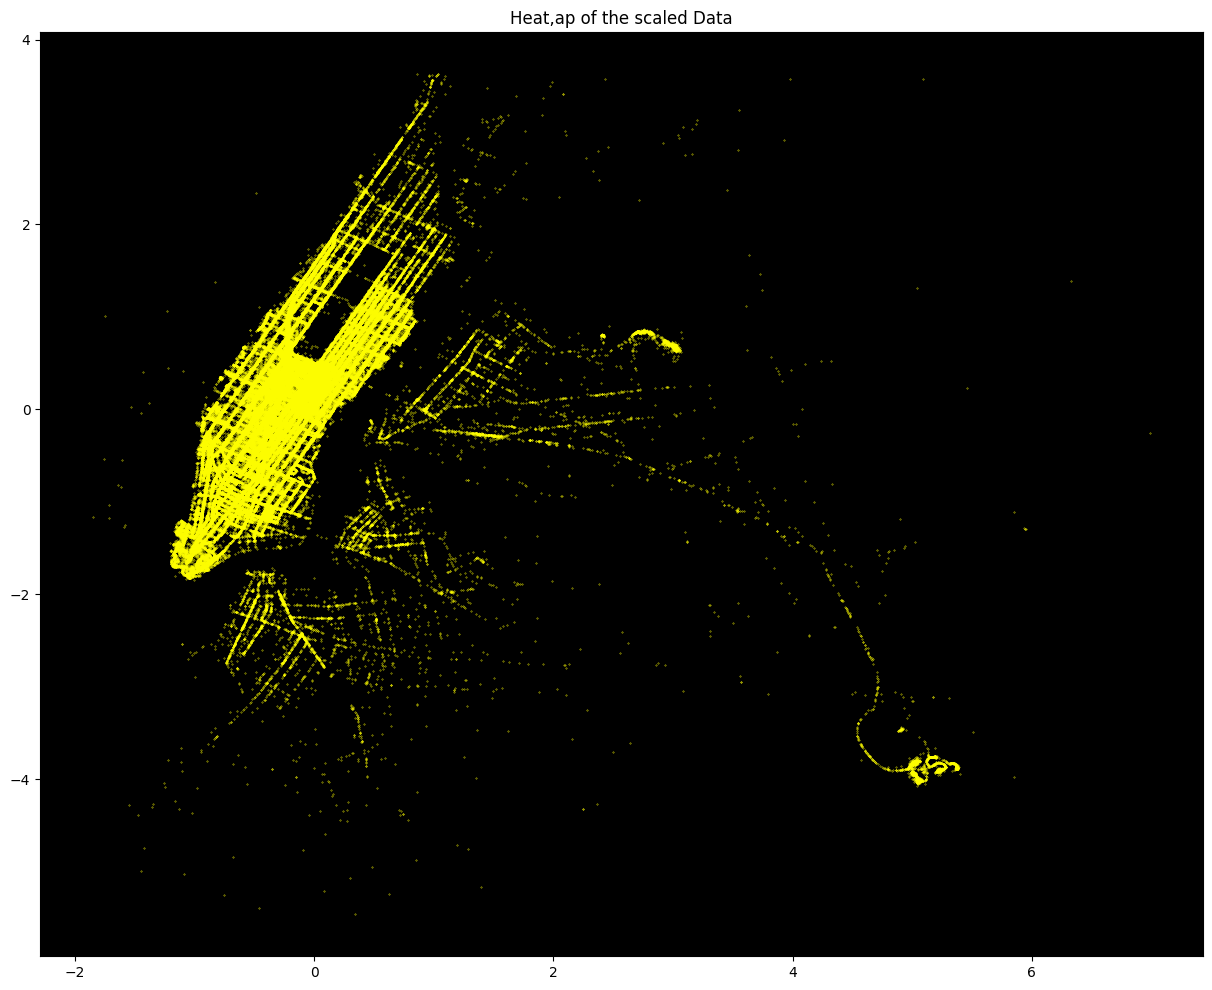

In [58]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,12),sharey=True)
ax.set_facecolor("k")
ax.scatter(scaled_sample_df["pickup_longitude"],scaled_sample_df["pickup_latitude"],s=0.08,color="yellow")
ax.set_title("Heat,ap of the scaled Data")


In [59]:
from sklearn.cluster import MiniBatchKMeans

In [61]:
df_reader = pd.read_csv(data_path, chunksize=70000)
scaler=StandardScaler()
for df in df_reader:
    scaler.partial_fit(df)

In [64]:
# get the scaler std and mean

print("The mean values are ", scaler.mean_)
print("The sigma values are ", scaler.scale_ )

The mean values are  [ 40.75107121 -73.9740618 ]
The sigma values are  [0.02722268 0.03675237]


In [67]:
np.radians(76.89)

np.float64(1.34198366185844)

In [89]:
def haversine_distance(lat1:float, lon1:float, lat2:float, lon2:float):
    """
    Calculate haversine distances between two points given their latitude and
    longitude coordinates
    """
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    
    earth_radius = 3958.8
    distance = earth_radius * c
    return distance

In [90]:
def select_optimum_k(k_values):
    for k in k_values:
        df_reader = pd.read_csv(data_path, chunksize=100000)
        mini_batch = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
        
        for chunk in df_reader:
            # scale the chunk
            scaled_chunk = scaler.transform(chunk)
            # train the model
            mini_batch.partial_fit(scaled_chunk)
            
        # centroid values
        centroids = scaler.inverse_transform(mini_batch.cluster_centers_)
        # calculate distances
        all_distances = []
        for i in centroids:
            distances = []
            for j in centroids:
                distance = haversine_distance(i[0], i[1], j[0], j[1])
                distances.append(distance)
            all_distances.append(distances)
        all_distances = np.array(all_distances)
        # sort array
        sorted_distances = np.sort(all_distances, axis=-1)
        # nearby regions
        region_count = 8
        # selected distances
        selected_distances = sorted_distances[:, 1:region_count+1]
        # average distances
        avg_distances = selected_distances.mean(axis=1)
        # count averages that fit criteria
        counter = ((avg_distances >= 1.0) & (avg_distances <= 1.5)).sum()
        percentage = ((avg_distances >= 1.0) & (avg_distances <= 1.5)).mean()
        print(f"For {k} clusters, the number of nearby regions that fits criteria are {counter} and is {percentage * 100:.1f}% regions of total")

In [91]:
k_values=np.arange(10,100,10)
k_values

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [92]:
select_optimum_k(k_values)

For 10 clusters, the number of nearby regions that fits criteria are 0 and is 0.0% regions of total
For 20 clusters, the number of nearby regions that fits criteria are 6 and is 30.0% regions of total
For 30 clusters, the number of nearby regions that fits criteria are 9 and is 30.0% regions of total
For 40 clusters, the number of nearby regions that fits criteria are 8 and is 20.0% regions of total
For 50 clusters, the number of nearby regions that fits criteria are 7 and is 14.0% regions of total
For 60 clusters, the number of nearby regions that fits criteria are 10 and is 16.7% regions of total
For 70 clusters, the number of nearby regions that fits criteria are 13 and is 18.6% regions of total
For 80 clusters, the number of nearby regions that fits criteria are 14 and is 17.5% regions of total
For 90 clusters, the number of nearby regions that fits criteria are 17 and is 18.9% regions of total


In [95]:
optimal_k=30

In [96]:
df_reader = pd.read_csv(data_path, chunksize=100000)


mini_batch=MiniBatchKMeans(n_clusters=optimal_k,n_init=10,random_state=42)
for chunk in df_reader:
    scaled_chunk=scaler.transform(chunk)
    mini_batch.partial_fit(scaled_chunk)
    
centroids=mini_batch.cluster_centers_
    
    

In [97]:
centroids=scaler.inverse_transform(centroids)

In [114]:
centroids

array([[ 40.80392392, -73.94975046],
       [ 40.74726528, -73.97685385],
       [ 40.69670159, -73.92094427],
       [ 40.64663525, -73.78474354],
       [ 40.7193993 , -74.00391496],
       [ 40.7625422 , -73.97901919],
       [ 40.77072843, -73.8689102 ],
       [ 40.73666362, -73.9884009 ],
       [ 40.78020052, -73.95328925],
       [ 40.68996945, -73.98620137],
       [ 40.72380321, -73.98889533],
       [ 40.78270006, -73.9778017 ],
       [ 40.74864784, -73.99461378],
       [ 40.75973368, -73.91560827],
       [ 40.74983178, -73.98338682],
       [ 40.75674608, -73.98706818],
       [ 40.71519695, -73.95483503],
       [ 40.82705049, -73.94394974],
       [ 40.75888759, -73.96930766],
       [ 40.77097094, -73.98421995],
       [ 40.70921009, -74.01111796],
       [ 40.76949887, -73.95941789],
       [ 40.73026981, -74.00151635],
       [ 40.79527921, -73.96899532],
       [ 40.66723527, -73.9900069 ],
       [ 40.76061753, -73.993915  ],
       [ 40.73552684, -73.98061923],
 

In [98]:
all_distances=[]
for i in centroids:
    distances=[]
    for j in centroids:
        distance=haversine_distance(i[0],i[1],j[0],j[1])
        distances.append(distance)
    all_distances.append(distances)

In [99]:
all_distances

[[np.float64(0.0),
  np.float64(4.16372255555237),
  np.float64(7.560310487032104),
  np.float64(13.883817170875037),
  np.float64(6.491733932795282),
  np.float64(3.2434477027126865),
  np.float64(4.810993770874473),
  np.float64(5.068302635222326),
  np.float64(1.649566414295339),
  np.float64(8.101476185273642),
  np.float64(5.902741444639815),
  np.float64(2.0744960483569868),
  np.float64(4.482944611705129),
  np.float64(3.5374088509111528),
  np.float64(4.131083353702056),
  np.float64(3.7997016226250437),
  np.float64(6.136282262142366),
  np.float64(1.6264449686561853),
  np.float64(3.2756526176475913),
  np.float64(2.904429129668931),
  np.float64(7.289865067385885),
  np.float64(2.4317407139418785),
  np.float64(5.765127996357443),
  np.float64(1.1704627517398947),
  np.float64(9.676688774565982),
  np.float64(3.7805022893408884),
  np.float64(4.994264512610637),
  np.float64(5.165661959505051),
  np.float64(8.676132483868475),
  np.float64(3.960172519638619)],
 [np.float64(4

In [101]:
sorted_distances=np.sort(all_distances)

In [102]:
sorted_distances

array([[ 0.        ,  1.17046275,  1.62644497,  1.64956641,  2.07449605,
         2.43174071,  2.90442913,  3.2434477 ,  3.27565262,  3.53740885,
         3.78050229,  3.79970162,  3.96017252,  4.13108335,  4.16372256,
         4.48294461,  4.81099377,  4.99426451,  5.06830264,  5.16566196,
         5.765128  ,  5.90274144,  6.13628226,  6.49173393,  7.28986507,
         7.56031049,  8.10147619,  8.67613248,  9.67668877, 13.88381717],
       [ 0.        ,  0.38520824,  0.83466661,  0.84554574,  0.89491143,
         0.93453618,  0.9497229 ,  1.06161155,  1.28395435,  1.39786924,
         1.68267844,  1.73935963,  1.74527216,  1.78680442,  2.1291437 ,
         2.39049179,  2.44883646,  2.49771118,  2.58829318,  3.18314532,
         3.31936779,  3.34286722,  3.9889529 ,  4.16372256,  4.5581976 ,
         4.84586092,  5.57235103,  5.77518367,  5.87736576, 12.23197903],
       [ 0.        ,  2.18727182,  2.33312628,  3.45017867,  3.60190277,
         4.0214796 ,  4.11861947,  4.15208245,  4

In [103]:
nearby_regions=8
selected_distances=sorted_distances[:,1:nearby_regions+1]

In [104]:
selected_distances

array([[ 1.17046275,  1.62644497,  1.64956641,  2.07449605,  2.43174071,
         2.90442913,  3.2434477 ,  3.27565262],
       [ 0.38520824,  0.83466661,  0.84554574,  0.89491143,  0.93453618,
         0.9497229 ,  1.06161155,  1.28395435],
       [ 2.18727182,  2.33312628,  3.45017867,  3.60190277,  4.0214796 ,
         4.11861947,  4.15208245,  4.36409798],
       [ 7.93169228,  9.36855262,  9.64097158, 10.09315318, 10.39482286,
        10.56112547, 10.85291444, 10.97425053],
       [ 0.76151738,  0.79871063,  0.84332096,  1.44318852,  1.46133899,
         1.65214612,  2.07874566,  2.23510174],
       [ 0.56752242,  0.58123428,  0.64283085,  0.79082054,  0.90747837,
         1.06161155,  1.13278419,  1.26008803],
       [ 2.55912324,  3.86816694,  4.46322742,  4.73679633,  4.81099377,
         5.31727743,  5.50409572,  5.52711246],
       [ 0.41490598,  0.76069091,  0.8165102 ,  0.88895546,  0.88962214,
         0.94694645,  0.9497229 ,  1.38933145],
       [ 0.80596199,  1.29403148

In [108]:
avg_dis=selected_distances.mean(axis=1)

In [113]:
((avg_dis >= 1.0 ) & (avg_dis <= 1.5)).mean()

np.float64(0.3)

In [117]:
df_reader = pd.read_csv(data_path, chunksize=80000)


mini_batch=MiniBatchKMeans(n_clusters=optimal_k,n_init=10,random_state=42)
for chunk in df_reader:
    scaled_chunk=scaler.transform(chunk)
    mini_batch.partial_fit(scaled_chunk)
    
centroids=mini_batch.cluster_centers_
    

In [122]:
df_reader = pd.read_csv(data_path, chunksize=80000)
scaled_sample_df=[]
for chunk in df_reader:
    scaled_chunk=scaler.transform(chunk.sample(500))
    scaled_sample_df.append(scaled_chunk)

In [123]:
scaled_sample_df=pd.concat(scaled_sample_df)

In [124]:
scaled_sample_df.shape

(208000, 2)

In [129]:
reg=mini_batch.predict(scaled_sample_df)

In [130]:
reg

array([ 7, 20,  7, ..., 12, 15, 27], shape=(208000,), dtype=int32)

In [131]:
scaled_sample_df

,pickup_latitude,pickup_longitude
40654,0.214144,-0.120977
75617,0.556480,-0.347872
30273,-0.083351,0.010012
48732,0.517664,-0.064098
70503,-2.709095,-0.244493
...,...,...
33211624,0.485995,0.335096
33211342,-1.112461,-0.644309
33204509,-0.454834,-0.702434
33214432,0.259966,0.133735


In [132]:
scaled_sample_df["Reg"]=reg

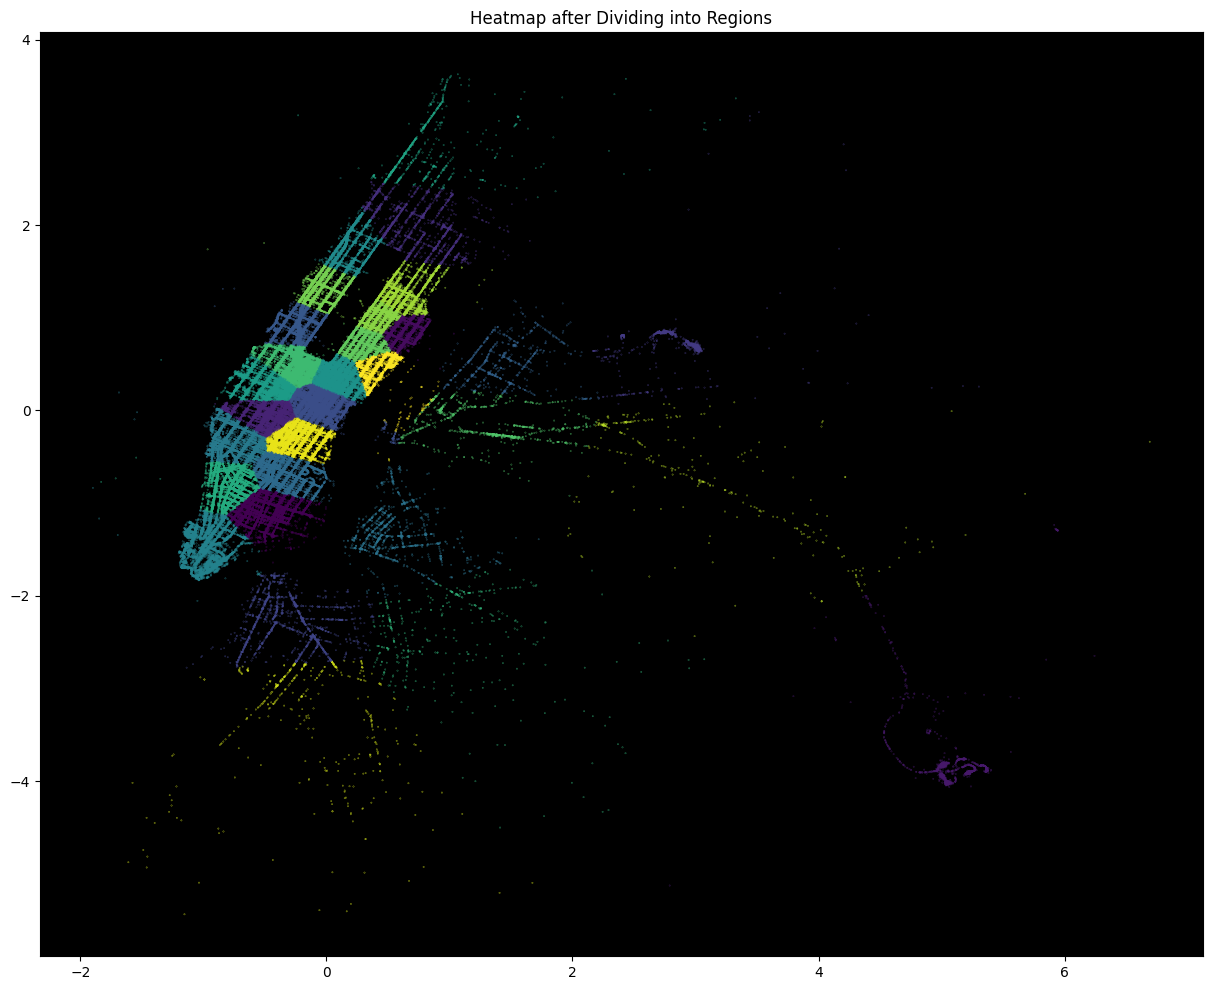

In [135]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,12),sharey=True)
ax.set_facecolor("k")
ax.set_title("Heatmap after Dividing into Regions")
ax.scatter(scaled_sample_df["pickup_longitude"],scaled_sample_df["pickup_latitude"],c=scaled_sample_df["Reg"],s=0.05)